<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220302_cv2_keypoints(GFTT_FAST)_descriptor(ORB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 특징점 검출기(GFTT, FAST)
# 특징 디스크립터 검출기(SIFT, SURF, ORB)

# GFTT(Good Feature to Track)

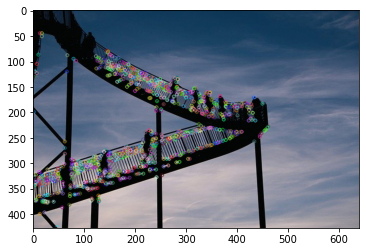

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Good Feature to Track Detector (GFTTD) 검출기 생성
gftt = cv2.GFTTDetector_create()
# 특징점 검출
keypoints = gftt.detect(img_gray, None) # len(keypoints) : 1000, list type
# 특징점 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None)

# 결과 출력
plt.imshow(img_draw[:,:,::-1])

# Fast

791

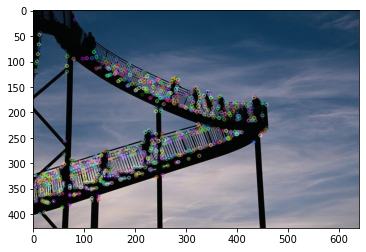

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Fast 특징 검출기
fast = cv2.FastFeatureDetector_create(50) # threshold(코너판단 임계값) default : 10
# 특징점 검출
keypoints = fast.detect(img_gray, None)
# 특징점 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None)

plt.imshow(img_draw[:,:,::-1])
len(keypoints)


### Fast(threshold 변화에 따른 keypoints 변화)

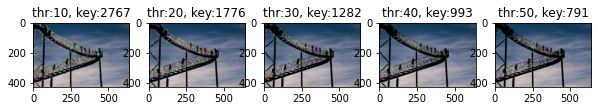

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

test_val = list(range(10, 60, 10))
plt.figure(figsize=(10, 5))
for idx, val in enumerate(test_val):
  # Fast 특징 검출기
  fast = cv2.FastFeatureDetector_create(val) # threshold(코너판단 임계값) default : 10
  # 특징점 검출
  keypoints = fast.detect(img_gray, None)
  # 특징점 그리기
  img_draw = cv2.drawKeypoints(img, keypoints, None)
  
  plt.subplot(1, len(test_val), idx+1)
  plt.title("thr:{}, key:{}".format(val, len(keypoints)))
  plt.imshow(img_draw[:,:,::-1])


  

In [17]:
cv2.__version__

'4.1.2'

# SURF(Speeded Up Robust Features) : cv2 3.4.2 이상에서 작동X
> SIFT의 속도를 개선한 알고리즘

In [18]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # SURF 추출기 생성(특징추출경계threshold:1000, 이미지 피라미드 계층수:3, 디스크립터 생성 플래그, 방향계산 플래그)
# surf = cv2.xfeatures2d.SURF_create(1000, 3, True, True)
# # 키포인트 검출 및 디스크립터 계산
# keypoints, desc = surf.detecAndCompute(img_gray, None)
# print(desc.shape, desc)

# ORB(Oriented and Rotated BRIEF)
> BRIEF 알고리즘에 방향과 회전을 추가한 알고리즘

(500, 32) [[126 178 176 ... 100 143  87]
 [ 97 119 121 ... 146  66 161]
 [ 82  32 158 ...  96 163   2]
 ...
 [  1 156  39 ... 129  81  61]
 [187 195 106 ... 140 248 205]
 [ 47 161  40 ...  15 218 134]]


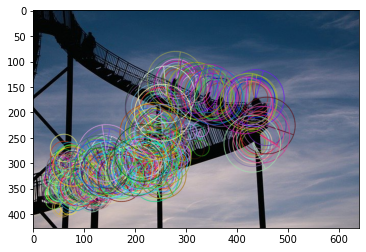

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SURF 추출기 생성(특징추출경계threshold:1000, 이미지 피라미드 계층수:3, 디스크립터 생성 플래그, 방향계산 플래그)
orb = cv2.ORB_create()
# 키포인트 검출 및 디스크립터 계산
keypoints, desc = orb.detectAndCompute(img_gray, None)
print(desc.shape, desc) # 500개의 특징점 검출, shape : (500, 32)

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS : 동그라미 크기를 size,angle 반영
plt.imshow(img_draw[:,:,::-1])

### cv2.drawKeypoints()의 파라미터 중 flags

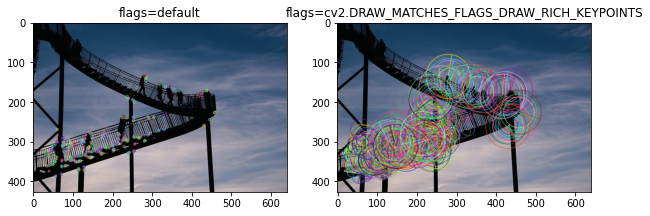

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SURF 추출기 생성(특징추출경계threshold:1000, 이미지 피라미드 계층수:3, 디스크립터 생성 플래그, 방향계산 플래그)
orb = cv2.ORB_create()
# 키포인트 검출 및 디스크립터 계산
keypoints, desc = orb.detectAndCompute(img_gray, None)
# print(desc.shape, desc) # 500개의 특징점 검출, shape : (500, 32)

img_draw1 = cv2.drawKeypoints(img, keypoints, None)
img_draw2 = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS : 동그라미 크기를 size,angle 반영

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img_draw1[:,:,::-1])
plt.title("flags=default")
plt.subplot(1,2,2)
plt.title("flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS")
plt.imshow(img_draw2[:,:,::-1])
